In [1]:
import numpy as np
import cv2
import glob
from matplotlib import pyplot as plt

In [2]:
MIN_MATCH_COUNT = 10

In [3]:
#imageNames = glob.glob('undis1/*.jpg')
imageNames = glob.glob('undis2/*.jpg')
images = [cv2.imread(imageName, 0) for imageName in imageNames]

In [4]:
imageNames

['undis2\\img1.jpg',
 'undis2\\img2.jpg',
 'undis2\\img3.jpg',
 'undis2\\img4.jpg',
 'undis2\\img5.jpg']

## Step by Step homography

In [3]:
tempCompare = [images[2], images[1]] 

In [4]:
sift = cv2.xfeatures2d.SIFT_create()

In [5]:
kp1, des1 = sift.detectAndCompute(tempCompare[0], None)
kp2, des2 = sift.detectAndCompute(tempCompare[1], None)

In [6]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

In [7]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [8]:
matches = flann.knnMatch(des1,des2,k=2)
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

In [11]:
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    h,w = tempCompare[0].shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    tempCompare[1] = cv2.polylines(tempCompare[1],[np.int32(dst)],True,255,3, cv2.LINE_AA)
else:
    print("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
    matchesMask = None

In [12]:
print(M)

[[  1.09244238e+00   2.36778748e-02  -2.27416614e+03]
 [ -5.77641045e-02   1.03640361e+00  -1.91728988e+02]
 [ -1.25768354e-05   1.82539065e-05   1.00000000e+00]]


In [13]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                    singlePointColor = None,
                    matchesMask = matchesMask, # draw only inliers
                    flags = 2)

In [14]:
img3 = cv2.drawMatches(tempCompare[0],kp1,tempCompare[1],kp2,good,None,**draw_params)

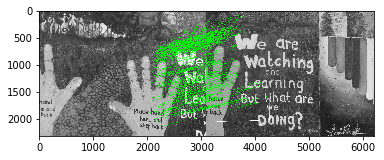

(<matplotlib.image.AxesImage at 0x1a590870940>, None)

In [15]:
plt.imshow(img3, 'gray'),plt.show()

In [17]:
cv2.imwrite('match\\match_1_2.jpg',img3)

True

## for-loop get four homographies

In [5]:
H = [] # save result in to H

homography bewteen 1 and 2:
[[  8.04307785e-01   5.82075109e-02   1.15171201e+03]
 [  7.01749033e-03   8.35662560e-01  -2.06552790e+02]
 [ -7.61121617e-06   1.54287835e-05   1.00000000e+00]]


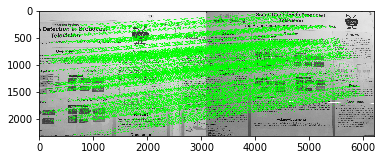

homography bewteen 2 and 3:
[[  9.82078761e-01   6.41258991e-02   1.57706793e+03]
 [  4.95062643e-02   9.54439048e-01   3.01334571e+02]
 [  3.03260535e-05   2.45719750e-06   1.00000000e+00]]


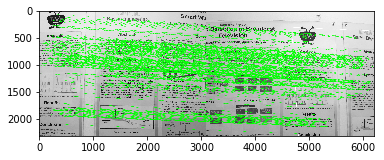

homography bewteen 3 and 4:
[[  5.93186358e-01  -1.43768794e-02   1.41827502e+03]
 [ -6.28252744e-03   6.11690377e-01   8.50633197e+02]
 [ -8.66460399e-06  -1.23321778e-05   1.00000000e+00]]


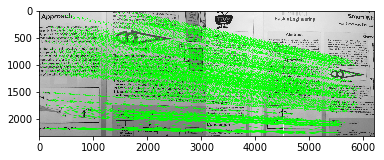

homography bewteen 4 and 5:
[[  1.67725326e+00  -3.06062038e-02   4.62208018e+02]
 [  5.34002757e-02   1.66786303e+00  -5.39611406e+02]
 [  1.33434963e-05  -1.57777363e-05   1.00000000e+00]]


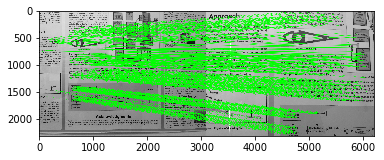

In [6]:
for i in range(1,5):
    print('homography bewteen %d and %d:' % (i, i+1))
    tempCompare = [images[i], images[i - 1]] 
    
    sift = cv2.xfeatures2d.SIFT_create()
    
    kp1, des1 = sift.detectAndCompute(tempCompare[0], None)
    kp2, des2 = sift.detectAndCompute(tempCompare[1], None)
    
    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)
    
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    
    matches = flann.knnMatch(des1,des2,k=2)
    good = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            good.append(m)
            
    if len(good)>MIN_MATCH_COUNT:
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        matchesMask = mask.ravel().tolist()

        h,w = tempCompare[0].shape
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,M)

        tempCompare[1] = cv2.polylines(tempCompare[1],[np.int32(dst)],True,255,3, cv2.LINE_AA)
    else:
        print("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
        matchesMask = None
        
    print(M)
    
    H.append(M)
    
    draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                    singlePointColor = None,
                    matchesMask = matchesMask, # draw only inliers
                    flags = 2)
    
    img3 = cv2.drawMatches(tempCompare[0],kp1,tempCompare[1],kp2,good,None,**draw_params)
    
    plt.imshow(img3, 'gray'),plt.show()
    
    cv2.imwrite('match\\match_%d_%d.jpg'% (i, i + 1), img3)

In [7]:
H

[array([[  8.04307785e-01,   5.82075109e-02,   1.15171201e+03],
        [  7.01749033e-03,   8.35662560e-01,  -2.06552790e+02],
        [ -7.61121617e-06,   1.54287835e-05,   1.00000000e+00]]),
 array([[  9.82078761e-01,   6.41258991e-02,   1.57706793e+03],
        [  4.95062643e-02,   9.54439048e-01,   3.01334571e+02],
        [  3.03260535e-05,   2.45719750e-06,   1.00000000e+00]]),
 array([[  5.93186358e-01,  -1.43768794e-02,   1.41827502e+03],
        [ -6.28252744e-03,   6.11690377e-01,   8.50633197e+02],
        [ -8.66460399e-06,  -1.23321778e-05,   1.00000000e+00]]),
 array([[  1.67725326e+00,  -3.06062038e-02,   4.62208018e+02],
        [  5.34002757e-02,   1.66786303e+00,  -5.39611406e+02],
        [  1.33434963e-05,  -1.57777363e-05,   1.00000000e+00]])]

In [8]:
dirName = 'Homographies2\\'
#dirName = 'Homographies1\\'

In [9]:
np.savetxt(dirName+'H12.txt', H[0])
np.savetxt(dirName+'H23.txt', H[1])
np.savetxt(dirName+'H34.txt', H[2])
np.savetxt(dirName+'H45.txt', H[3])

In [10]:
H12 = np.loadtxt(dirName + 'H12.txt')
H23 = np.loadtxt(dirName + 'H23.txt')
H34 = np.loadtxt(dirName + 'H34.txt')
H45 = np.loadtxt(dirName + 'H45.txt')
H = [H12, H23, H34, H45]

In [11]:
H

[array([[  8.04307785e-01,   5.82075109e-02,   1.15171201e+03],
        [  7.01749033e-03,   8.35662560e-01,  -2.06552790e+02],
        [ -7.61121617e-06,   1.54287835e-05,   1.00000000e+00]]),
 array([[  9.82078761e-01,   6.41258991e-02,   1.57706793e+03],
        [  4.95062643e-02,   9.54439048e-01,   3.01334571e+02],
        [  3.03260535e-05,   2.45719750e-06,   1.00000000e+00]]),
 array([[  5.93186358e-01,  -1.43768794e-02,   1.41827502e+03],
        [ -6.28252744e-03,   6.11690377e-01,   8.50633197e+02],
        [ -8.66460399e-06,  -1.23321778e-05,   1.00000000e+00]]),
 array([[  1.67725326e+00,  -3.06062038e-02,   4.62208018e+02],
        [  5.34002757e-02,   1.66786303e+00,  -5.39611406e+02],
        [  1.33434963e-05,  -1.57777363e-05,   1.00000000e+00]])]

## warp images

In [12]:
#targetSize = (7500,3000)
targetSize = (6000,2500)

In [13]:
Hto1 = [np.eye(3)]
for i in range(4):
    Hto1.append(Hto1[i].dot(H[i]))

In [14]:
Hto1

[array([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]]),
 array([[  8.04307785e-01,   5.82075109e-02,   1.15171201e+03],
        [  7.01749033e-03,   8.35662560e-01,  -2.06552790e+02],
        [ -7.61121617e-06,   1.54287835e-05,   1.00000000e+00]]),
 array([[  8.27702109e-01,   1.09962465e-01,   2.43769996e+03],
        [  4.19983288e-02,   7.97531440e-01,   5.63282882e+01],
        [  2.36150612e-05,   1.66949548e-05,   9.92645821e-01]]),
 array([[  4.69169053e-01,   2.53010590e-02,   3.70514691e+03],
        [  1.94142602e-02,   4.86543852e-01,   7.94300187e+02],
        [  5.30236268e-06,  -2.36885239e-06,   1.04033976e+00]]),
 array([[  8.37706019e-01,  -3.06196136e-02,   3.90834787e+03],
        [  6.91429486e-02,   7.98362049e-01,   5.40729002e+02],
        [  2.26486774e-05,  -2.05274129e-05,   1.04406881e+00]])]

In [15]:
#imageNames = glob.glob('undis1/*.jpg')
imageNames = glob.glob('undis2/*.jpg')
images = [cv2.imread(imageName) for imageName in imageNames]
warppedImages = []

In [16]:
for i in range(5):
    temp = cv2.warpPerspective(images[i], Hto1[i], targetSize)
    warppedImages.append(temp)
    #cv2.imwrite('warpped\\warpped%d.jpg' % (i+1), temp)
    cv2.imwrite('warpped2\\warpped%d.jpg' % (i+1), temp)

## stitch images

In [17]:
result = np.zeros((targetSize[1],targetSize[0],3), np.uint8)

In [18]:
for i in range(int(targetSize[1] / 500)):
    for j in range(int(targetSize[0] / 500)):
        for ii in range(500):
            for jj in range(500):
                x = i * 500 + ii
                y = j * 500 + jj
                for k in range(5):
                    if warppedImages[k][x,y,0] != 0 or warppedImages[k][x,y,1] != 0 or warppedImages[k][x,y,2] != 0:
                        result[x,y] = warppedImages[k][x,y]
        cv2.imwrite('result2.jpg',result)